# **Homework #1 TIM 147**

## **Data Vizulation** 

#### **Install all import library prerequiste**

In [154]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\garfi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\garfi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\garfi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### **Read Input Excel Data**

In [155]:
import pandas
dataframe = pandas.read_excel("Customer_Churn.xlsx")
dataframe.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


- The data seems to be answers collected by a survey completed by a cell phone company to understand customer statisfication and determine whether their could be a possible correlation to why people are leaving the plan. 

#### **Understand data**

In [156]:
dataframe.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [157]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [158]:
CustomerChanging = dataframe.loc[dataframe["LEAVE"].isin(["LEAVE"])]
CustomerNotChanging = dataframe.loc[dataframe["LEAVE"].isin(["STAY"])]

- The income + household price and overage - leftover could be great indictors whether the customer would leave or not. 
- I split the dataset into customers who left the plan and customers that are currently staying with the plan and haven't left. 
    - As this split would ensure the comparison of the great indicators would show directly a possible pattern if any why some customers have left or stayed using the cellphone plan. 

In [159]:
householdpricedataframeCustomerChanging = CustomerChanging["INCOME"] + CustomerChanging["HOUSE"]
print("\nCustomer willing to change houshold + income info")
householdpricedataframeCustomerChanging.info()
print(householdpricedataframeCustomerChanging.head())
householdpricedataframeCustomerNotChanging = CustomerNotChanging["INCOME"] + CustomerNotChanging["HOUSE"]
print("\nCustomer's unwilling to change household + income info")
householdpricedataframeCustomerNotChanging.info()
print(householdpricedataframeCustomerNotChanging.head())
overageCustomerChanging = CustomerChanging["OVERAGE"] - CustomerChanging["LEFTOVER"]
print("\nCustomer's willing to change overage - leftover info")
overageCustomerChanging.info()
print(overageCustomerChanging.head())
overageCustomerNotChanging = CustomerNotChanging["OVERAGE"] - CustomerNotChanging["LEFTOVER"]
print("\nCustomer's unwilling to change overage - leftover info")
overageCustomerNotChanging.info()
print(overageCustomerNotChanging.head())


Customer willing to change houshold + income info
<class 'pandas.core.series.Series'>
Index: 9852 entries, 3 to 19999
Series name: None
Non-Null Count  Dtype
--------------  -----
9852 non-null   int64
dtypes: int64(1)
memory usage: 153.9 KB
3     908305
9     259384
18    653348
20    411634
22    317843
dtype: int64

Customer's unwilling to change household + income info
<class 'pandas.core.series.Series'>
Index: 10148 entries, 0 to 19996
Series name: None
Non-Null Count  Dtype
--------------  -----
10148 non-null  int64
dtypes: int64(1)
memory usage: 158.6 KB
0    345331
1    836733
2    332322
4    253999
5    766697
dtype: int64

Customer's willing to change overage - leftover info
<class 'pandas.core.series.Series'>
Index: 9852 entries, 3 to 19999
Series name: None
Non-Null Count  Dtype
--------------  -----
9852 non-null   int64
dtypes: int64(1)
memory usage: 153.9 KB
3       5
9     156
18      5
20      0
22    237
dtype: int64

Customer's unwilling to change overage - leftov

- Splitting the data into customer's that will leave and customer's that won't leave ensure that the income and values are compared against similiar customer's, which ensures the data won't be skewed. 

#### **Data Visualization**

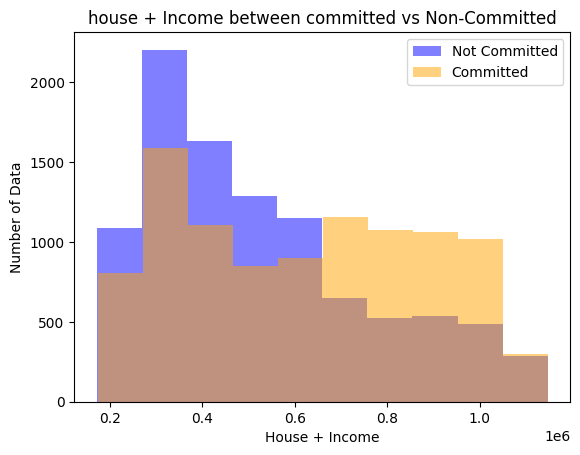

In [160]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
## ---- Used .sample from chatgpt to ensure a random sample is used as the datasets are not consistent in sample size ----
ax.hist(householdpricedataframeCustomerChanging.tolist(), color="blue", alpha=0.5, label="Not Committed")
ax.hist(householdpricedataframeCustomerNotChanging.sample(householdpricedataframeCustomerChanging.count()), color="orange", alpha=0.5, label="Committed")
ax.set_xlabel('House + Income')
ax.set_ylabel('Number of Data')
ax.set_title("house + Income between committed vs Non-Committed")
ax.legend()
plt.show()

- This histogram shows the house price and income between people that are committed and not committed. This is useful as it shows the house and income does have a possible affect on customers being committed or not comitted. 
- As it seems lower house price and income leads to more people that not comitted to the plan. 

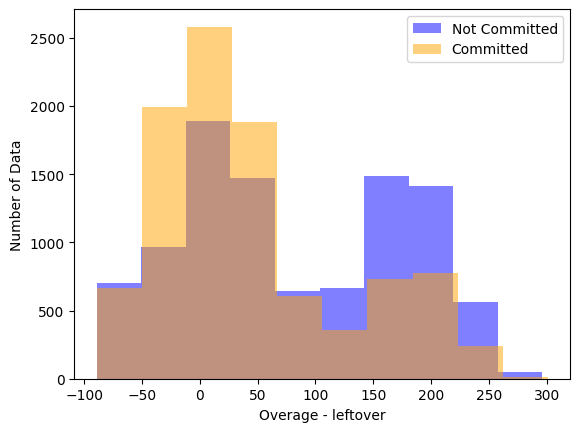

In [161]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
## ---- Used .sample from chatgpt to ensure a random sample is used as the datasets are not consistent in sample size ----
ax.hist(overageCustomerChanging.tolist(), color="blue", alpha=0.5, label="Not Committed")
ax.hist(overageCustomerNotChanging.sample(overageCustomerChanging.count()), color="orange", alpha=0.5, label="Committed")
ax.set_xlabel('Overage - leftover')
ax.set_ylabel('Number of Data')
ax.set_title("")
ax.legend()
plt.show()

- The histogram shows that overage and leftover between comitted and un comitted are possible correlation. 
- Customers with more overage are more likely to leave then customers with little to no overage and instead more time leftover. 

The conclusion is that overage, leftover, house, and income are all possible reasons a customer may be comitted or uncomitted to the phone plan. 

## **Prediction Model**

### **KNN Model**

#### **Prepare Dataset for KNN Model**

In [162]:
from sklearn.model_selection import train_test_split
#---- Creates a copy of the original dataframe ----
knn_dataframe = dataframe.copy()
collegelist = []
#---- Creates a list of column adjusting the text values to numberical values ----
for x in dataframe["COLLEGE"]:
    if x == "zero":
        collegelist.append(0)
    elif x == "one":
        collegelist.append(1)
    else:
        continue
knn_dataframe['COLLEGE'] = collegelist
#---- Uses all the columns as features except for the labeled column and similiar columns ----
knn_x = knn_dataframe.drop(["LEAVE", "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"], axis=1)
#---- Labeled column in the dataframe ----
knn_y = knn_dataframe["LEAVE"]
#---- Split the data into testing where 20% is for testing and 80% is for training ----
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_x, knn_y, test_size=0.2)

#### **Run KNN Model on Training Dataset**

In [163]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=6)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn.fit(knn_X_train, knn_y_train)

KNeighborsClassifier(n_neighbors=6)

#### **Analyze KNN Model on Testing Dataset**

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

#---- Completes 10 tests of random samples and grabs the accuracy score ----
knn_accuracy_scores = cross_val_score(knn, knn_X_test, knn_y_test, cv=10, scoring='accuracy')

# --- Iterates through all the accuracy scores created by cross_val_score and prints the result ----
print("Accuracy Scores for Each Fold:")
for i, score in enumerate(knn_accuracy_scores):
    print("Fold " + str(i+1), ": " + str(score))

knn_mean_accuracy = np.mean(knn_accuracy_scores)
print("Mean Accuracy: ", knn_mean_accuracy)


Accuracy Scores for Each Fold:
Fold 1 : 0.61
Fold 2 : 0.5925
Fold 3 : 0.605
Fold 4 : 0.565
Fold 5 : 0.55
Fold 6 : 0.64
Fold 7 : 0.5925
Fold 8 : 0.6125
Fold 9 : 0.595
Fold 10 : 0.59
Mean Accuracy:  0.59525


- The accuracy for KNN is around 0.57925 using 6 neighbors. 

### **Decision Tree Model**

#### **Prepare Dataset for Decision Tree Model**

In [165]:
from sklearn.model_selection import train_test_split
#---- Creates a copy of the original dataframe ----
decision_tree_dataframe = dataframe.copy()
#---- Creates a list of column adjusting the text values to numberical values ----
collegelist = []
for x in dataframe["COLLEGE"]:
    if x == "zero":
        collegelist.append(0)
    elif x == "one":
        collegelist.append(1)
    else:
        continue
decision_tree_dataframe['COLLEGE'] = collegelist
#---- Uses all the columns as features except for the columns that are similiar ----
decision_tree_x = decision_tree_dataframe.drop(["LEAVE", "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"], axis=1)
#---- Labeled column in the dataframe ----
decision_tree_y = decision_tree_dataframe["LEAVE"]
#---- Split the data into testing where 20% is for testing and 80% is for training ----
decision_tree_X_train, decision_tree_X_test, decision_tree_y_train, decision_tree_y_test = train_test_split(decision_tree_x, decision_tree_y, test_size=0.2)

#### **Run Decision Tree Model on Training Dataset**

In [166]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(max_leaf_nodes=20, max_depth=4)

# Train the model
decision_tree.fit(decision_tree_X_train, decision_tree_y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20)

#### **Analyze Decision Tree Model on Testing Dataset**

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

#---- Completes 10 tests of random samples and grabs the accuracy score ----
decision_tree_accuracy_scores = cross_val_score(decision_tree, decision_tree_X_test, decision_tree_y_test, cv=10, scoring='accuracy')

# --- Iterates through all the accuracy scores created by cross_val_score and prints the result ----
print("Accuracy Scores for Each Fold:")
for i, score in enumerate(decision_tree_accuracy_scores):
    print("Fold " + str(i+1), ": " + str(score))

decision_tree_mean_accuracy = np.mean(decision_tree_accuracy_scores)
print("Mean Accuracy: ", decision_tree_mean_accuracy)


Accuracy Scores for Each Fold:
Fold 1 : 0.66
Fold 2 : 0.68
Fold 3 : 0.6825
Fold 4 : 0.685
Fold 5 : 0.6325
Fold 6 : 0.695
Fold 7 : 0.6875
Fold 8 : 0.655
Fold 9 : 0.7225
Fold 10 : 0.6875
Mean Accuracy:  0.6787500000000001


- The accuracy of Decision Tree is around 0.6967 using a max leaf nodes of 20 and a max depth of 4

#### **Which predictive model does the best on predicting customer_churn dataset?**

- The decision tree model works the best on predicting the customer_churn dataset with a cross validation score of around 0.6967 compared to the knn model cross valdiation score of 0.57925. 

#### **Is the dataset balanced?**

- The dataset is balanced with no empty outputs in addition, the removal of overlaping text string in the dataset. 

#### **How did I improve the dataset?**

- I removed all of these columns: "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN" as I deemed those columns too similiar to LEAVE, which was the column to compare. 

#### **Report correlation between data entries and predictive models?**

- There is an overla between all possible inputs and the reason they leave except for "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN". There could be more overlapping columns like handset price, over 15 min calls, and average call duration possibly. There is most likely a heavy correlation between income, household, overage, and leftover that may make a customer leave the phone plan. 

#### **Recommendations to remove churn based on data?**

- I would recommend to cut down these columns: "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN" as they seem to overlap the column "LEAVE" and act similiary to one another. 

## **Linear Regression, Logistic Regression, and NN**

In [168]:
import pandas as pd
def convert_features_to_one_hot(df, feature_name_list):
  for feature_name in feature_name_list:
    df = pd.get_dummies(df, columns=[feature_name], dtype=float)
  
  return df

### **Linear Regression**

#### **Preparing the dataset**

In [214]:
Linear_Regression_DataFrame = dataframe.copy()
#---- Initial Cleaning of the dataset ----
Linear_Regression_DataFrame.replace(to_replace="zero", value=0, inplace=True)
Linear_Regression_DataFrame.replace(to_replace="one", value=1, inplace=True)
Linear_Regression_DataFrame.replace(to_replace="STAY", value=1, inplace=True)
Linear_Regression_DataFrame.replace(to_replace="LEAVE", value=0, inplace=True)
#---- Create dataframe of X and Y vlaues where Y value only keeps Churn value ----
Linear_Regression_X = Linear_Regression_DataFrame[Linear_Regression_DataFrame.columns.tolist()[0:len(Linear_Regression_DataFrame.columns)-1]]
Linear_Regression_Y = Linear_Regression_DataFrame[Linear_Regression_DataFrame.columns.tolist()[-1]]
#---- Creating Validation and Training Dataset ----
from sklearn.model_selection import train_test_split
Linear_Regression_X_train, Linear_Regression_X_val, Linear_Regression_Y_train, Linear_Regression_Y_val = train_test_split(Linear_Regression_X, Linear_Regression_Y, test_size=0.2, random_state=42)
#---- Convert one_hot_encoding_features ----
Linear_Regression_X_train = convert_features_to_one_hot(Linear_Regression_X_train, ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
Linear_Regression_X_val = convert_features_to_one_hot(Linear_Regression_X_val, ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])

#### **Linear Regression Model**

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
Linear_Regression_Model = LinearRegression().fit(Linear_Regression_X_train, Linear_Regression_Y_train)
Linear_Regression_Scores = cross_val_score(Linear_Regression_Model, Linear_Regression_X_train, Linear_Regression_Y_train, cv=5, scoring="neg_mean_squared_error")
Linear_Regression_Y_predict = Linear_Regression_Model.predict(Linear_Regression_X_val)
Linear_Regression_MSE = mean_squared_error(Linear_Regression_Y_val, Linear_Regression_Y_predict)
Linear_Regression_r2 = r2_score(Linear_Regression_Y_val, Linear_Regression_Y_predict)
print("Mean Squared Error: ", Linear_Regression_MSE)
print("Average Score: ", Linear_Regression_Scores.mean())

Mean Squared Error:  0.2194419130156763
Average Score:  -0.22153270231240976


#### **Linear Regression Model Conclusion**

The average error between the predicted vs the actual is around 0.22, which could be potentially concluded that the linear regression as an accuracy of around 0.77847. 

### **Logistic Regression**

#### **Preparing the dataset**

In [204]:
Logistic_Regression_DataFrame = dataframe.copy()
#---- Initial Cleaning of the dataset ----
Logistic_Regression_DataFrame.replace(to_replace="zero", value=0, inplace=True)
Logistic_Regression_DataFrame.replace(to_replace="one", value=1, inplace=True)
#Logistic_Regression_DataFrame.replace(to_replace="STAY", value=1, inplace=True)
#---- Create dataframe of X and Y vlaues where Y value only keeps Churn value ----
Logistic_Regression_X = Logistic_Regression_DataFrame[Logistic_Regression_DataFrame.columns.tolist()[0:len(Logistic_Regression_DataFrame.columns)-1]]
Logistic_Regression_Y = Logistic_Regression_DataFrame[Logistic_Regression_DataFrame.columns.tolist()[-1]]
#---- Creating Validation and Training Dataset ----
from sklearn.model_selection import train_test_split
Logistic_Regression_X_train, Logistic_Regression_X_val, Logistic_Regression_Y_train, Logistic_Regression_Y_val = train_test_split(Logistic_Regression_X, Logistic_Regression_Y, test_size=0.2, random_state=42)
#---- Convert one_hot_encoding_features ----
Logistic_Regression_X_train = convert_features_to_one_hot(Logistic_Regression_X_train, ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
Logistic_Regression_X_val = convert_features_to_one_hot(Logistic_Regression_X_val, ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
Logistic_Regression_X_train.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
5894,1,98418,65,0,226957,394,5,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3728,1,135755,0,0,377016,535,29,14,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8958,0,149358,212,63,634847,558,20,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7671,1,35289,207,22,873341,202,22,6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5999,1,83384,36,0,178986,275,0,12,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### **Logistic Regression Model**

In [205]:
#---- Create Linear Regression Model ----
from sklearn.linear_model import LogisticRegression
Logistic_LR_model = LogisticRegression(penalty="l2").fit(Logistic_Regression_X_train, Logistic_Regression_Y_train)
#---- Prediction ----
from sklearn.model_selection import cross_val_score
Logistic_Regression_Score = cross_val_score(Logistic_LR_model, Logistic_Regression_X_train, Logistic_Regression_Y_train, cv=10)
Logistic_Regression_x_predict = Logistic_LR_model.predict(Logistic_Regression_X_val)
from sklearn import metrics
Logistic_Regression_accuracy = metrics.accuracy_score(Logistic_Regression_Y_val, Logistic_Regression_x_predict)
print("accuracy: ", Logistic_Regression_accuracy)
print("Mean Accuracy: ", Logistic_Regression_Score.mean())

accuracy:  0.633
Mean Accuracy:  0.6324375


#### **Logistic Regression Model Conclusion**

Using the logistic regression where X is all the values excluding the LEAVE and STAY column, the accuracy of the logistic regression model seems to be around 0.6276. 

### **Neural Network**

#### **Prepare Dataset**

In [206]:
Neural_Network_DataFrame = dataframe.copy()
#---- Initial Cleaning of the dataset ----
Neural_Network_DataFrame.replace(to_replace="zero", value=0, inplace=True)
Neural_Network_DataFrame.replace(to_replace="one", value=1, inplace=True)
Neural_Network_DataFrame.replace(to_replace="LEAVE", value=0, inplace=True)
Neural_Network_DataFrame.replace(to_replace="STAY", value=1, inplace=True)
#---- Create dataframe of X and Y vlaues where Y value only keeps Churn value ----
Neural_Network_X = Neural_Network_DataFrame[Neural_Network_DataFrame.columns.tolist()[0:len(Neural_Network_DataFrame.columns)-1]]
Neural_Network_Y = Neural_Network_DataFrame[Neural_Network_DataFrame.columns.tolist()[-1]]
#---- Creating Validation and Training Dataset ----
from sklearn.model_selection import train_test_split
Neural_Network_X_train, Neural_Network_X_val, Neural_Network_Y_train, Neural_Network_Y_val = train_test_split(Neural_Network_X, Neural_Network_Y, test_size=0.2, random_state=42)
#---- Convert one_hot_encoding_features ----
Neural_Network_X_train = convert_features_to_one_hot(Neural_Network_X_train, ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
Neural_Network_X_val = convert_features_to_one_hot(Neural_Network_X_val, ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
Neural_Network_X_train.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
5894,1,98418,65,0,226957,394,5,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3728,1,135755,0,0,377016,535,29,14,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8958,0,149358,212,63,634847,558,20,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7671,1,35289,207,22,873341,202,22,6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5999,1,83384,36,0,178986,275,0,12,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### **Set up PyTorch**

In [207]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Convert training data to PyTorch tensors and move to device
Neural_Network_X_train = torch.tensor(Neural_Network_X_train.values, dtype=torch.float32).to(device)
Neural_Network_Y_train = torch.tensor(Neural_Network_Y_train.values, dtype=torch.long).to(device)

# Convert validation data to PyTorch tensors and move to device
Neural_Network_X_val = torch.tensor(Neural_Network_X_val.values, dtype=torch.float32).to(device)
Neural_Network_Y_val = torch.tensor(Neural_Network_Y_val.values, dtype=torch.long).to(device)

##### **Changeable Parameters**

In [208]:
D = Neural_Network_X_train.shape[1]  # feature dimensions
C = 2  # num_classes
H = 6  # num_hidden_units

# Set learning rate and regularization strength
learning_rate = 1e-3
lambda_l2 = 1e-3

# Set number of training epochs
epochs = 27000

#### **Neural Network Model**

In [209]:
from torch import nn
###### 1. Your codes start here.######
Neural_Network_Model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C),
)
###### Your codes end here.######
Neural_Network_Model.to(device)

# nn package has different loss functions.
# we use cross entropy loss for our classification task
###### 2. Your codes start here.######
Neural_Network_criterion = torch.nn.CrossEntropyLoss()
###### Your codes end here.######

# we use the optim package to apply
# ADAM for our parameter updates
###### 3. Your codes start here.######
Neural_Network_optimizer = torch.optim.Adam(Neural_Network_Model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
###### Your codes end here.######

for t in range(epochs):
    ###### Your codes start here.######
    x_pred = Neural_Network_Model(Neural_Network_X_train)

    # Append pre-train output

    # Compute the loss and accuracy
    loss = Neural_Network_criterion(x_pred, Neural_Network_Y_train)
    #("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), accuracy))

    # zero the gradients before running
    # the backward pass.
    Neural_Network_optimizer.zero_grad()

    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params.
    loss.backward()

    # Update params
    Neural_Network_optimizer.step()


with torch.no_grad():
  Neural_Network_y_val_pred = Neural_Network_Model(Neural_Network_X_val)
  _, Neural_Network_predicted_val = torch.max(Neural_Network_y_val_pred, 1)
  val_acc = (Neural_Network_Y_val == Neural_Network_predicted_val).sum().float() / len(Neural_Network_Y_val)

  # Print validation accuracy
  print(f"Neural network model validation accuracy: {val_acc}")

Neural network model validation accuracy: 0.5137500166893005


#### **Neural Network Model Conclusion**

Using a very basic training model for the Neural Network Model, the Neural Network Model completes with an average accuracy of around 0.51. In addition, splitting the X and Y to where X is all the data exclusing the LEAVE and STAY data and the LEAVE and STAY column data is replaced with 0's and 1's 

#### **Model Recommendations for this dataset**

I would recommend the usage of logistic regression or linear regression as their seems to be a better accuracy compared to the neural network model. 